In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import TensorLearning as tl

In [2]:
data = pd.read_csv("fashion-mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y = (data.values)[:, 0]
X = (data.values)[:, 1:]
print('X =', X)
print()
print('Y =', Y)

X = [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Y = [2 9 6 ... 8 8 7]


In [4]:
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [5]:
# Normalize data.
X, mu, sigma = tl.normalization(X, method='mean_normalization')

In [6]:
# TRANSFORM DATA INTO TENSOR

# If display is True, the program shows the number of inputs per class before and after the run.
# After the function all classes have the same number of inputs, and the inputs of each class are
# joined together to form a slice of T. In this case all classes have same number of inputs.
T = tl.data2tens(X, Y, display=True)
print()
print('T.shape =', T.shape)
print()

Inputs of class 0 = 6000
Inputs of class 1 = 6000
Inputs of class 2 = 6000
Inputs of class 3 = 6000
Inputs of class 4 = 6000
Inputs of class 5 = 6000
Inputs of class 6 = 6000
Inputs of class 7 = 6000
Inputs of class 8 = 6000
Inputs of class 9 = 6000

After fixing number of inputs per class:
Inputs of class 0 = 6000
Inputs of class 1 = 6000
Inputs of class 2 = 6000
Inputs of class 3 = 6000
Inputs of class 4 = 6000
Inputs of class 5 = 6000
Inputs of class 6 = 6000
Inputs of class 7 = 6000
Inputs of class 8 = 6000
Inputs of class 9 = 6000

T.shape = (6000, 784, 10)



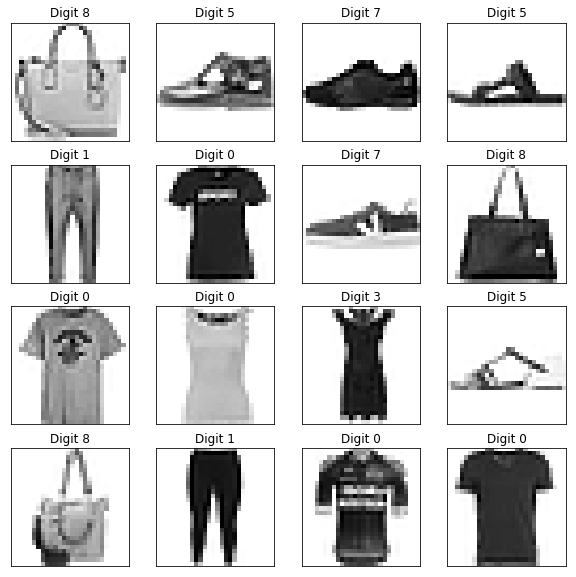

In [7]:
# Below we plot some slices to visualize what kind of images we are dealing with.
num_rows = 4
num_cols = 4    
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10), sharex='col', sharey='row')     
for i in range(num_rows):
    for j in range(num_cols):
        element = np.random.randint(0, 6000)
        element_class = np.random.randint(0, 10)
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].title.set_text('Digit ' + str(element_class))
        ax[i, j].imshow(-T[element, :, element_class].reshape(28, 28), cmap='gray')

In [8]:
# TRAINING

# The central tensor of the MLSVD has shape (R1, R2, R3), where R1 <= min(6000, R), so we can't make R 
# less than the number of inputs

R = 6000
R2 = 200

class options:
    display = 3
    trunc_dims = [6000, R2, 10]
    
F, U2, success = tl.mlsvd_train(T, R, options)

print('F.shape =', F.shape)
print('U2.shape =', U2.shape)
print('success =', success)

Training model...
Shape of MLSVD: (6000, 200, 10)
Error: 0.18017212713856715
Working with 25.5102 % of the original size

F.shape = (6000, 200, 10)
U2.shape = (784, 200)
success = True


In [9]:
# LOADING TEST DATASET

data_test = pd.read_csv("fashion-mnist_test.csv")
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y_test = (data_test.values)[:, 0]
X_test = (data_test.values)[:, 1:]
print('X =', X_test)
print()
print('Y =', Y_test)

X = [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 3 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Y = [0 1 2 ... 8 8 1]


In [11]:
print(X_test.shape, Y_test.shape)

(10000, 784) (10000,)


In [12]:
# Normalize data using the parameters found before.
X_test = (X_test - mu)/sigma

Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished
Computing predictions...
Finished


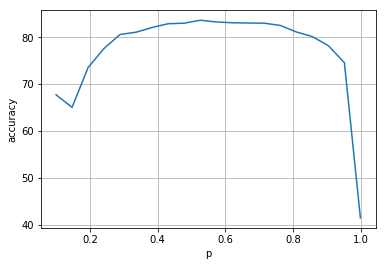

p = 0.5258421052631579
accuracy = 83.64 %


In [13]:
# TESTING 

# The parameter p is a value between 0 and 1, where 0 means 0% of the energy is retained and 1 means 100% 
# of the energy is retained. See the function 'mlsvd_test' for more details.

values = np.linspace(0.1, 0.999, 20)
accuracies = np.zeros((len(values), 2))

i = 0
for p in values:
    accuracy = tl.mlsvd_test(X_test, Y_test, F, U2, p)
    accuracies[i, 0] = p
    accuracies[i, 1] = accuracy
    i += 1
    
plt.plot(values, accuracies[:, 1])
plt.grid()
plt.xlabel('p')
plt.ylabel('accuracy')
plt.show()

# Display the value p for which max accuracy is attained.
idx = np.argmax(accuracies[:,1])
best_p = accuracies[idx, 0]
print('p =', best_p)
print('accuracy =', accuracies[idx, 1], '%')